In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from Function.pipeline import *

In [2]:
data = pd.read_csv('data\credit_customers.csv')
data.columns = data.columns.str.strip()
data = data.rename(columns={"class": "Target"})

In [3]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [5]:
print(data['Target'].value_counts())
print('\n')
print('--------------Check Imbalacing-------------')
print(f'Bit rate: {300/700 * 100:.3f}%')

Target
good    700
bad     300
Name: count, dtype: int64


--------------Check Imbalacing-------------
Bit rate: 42.857%


## About the Data Dictionary


- checking_status: The currently balance account.
- duration: duration of the credit payment, in months.
- credit_history: Is the customer credit history. It can have the following values:
    + existing paid: currently credit process;
    + all paid: all the credit are paid by the customer;
    + delayed previously: past delays at the credit payment;
    + critical/other existing credit: critical credit accounts;
    + no credits/all paid: customer that never gets credit.
- purpose: porpouse of the credit requested.
- credit_amount: Amount of the credit requested
- savings_status: Balance account of savings/ bond.
- employment:How many years the customer has employed.
- installment_commitment: Percentual that the customer cannot reach due to the income. When a customer takes a credit, the installment cannot ultrapass a percentual of customer income.
- personal_status: if is divorced, married, etc.
- other_parties: Another part involve on the credit, like guarantos ("fiador").
- residence_since: How many year the customer has in the country.
- property_magnitude: The good of the customer.
- age: The age of the customer.
- other_payment_plans: If the customer has another credit line and how the type (store, bank, etc).
- housing:The housing customer type, could be own, for free or rent.
- existing_credits: Number of existing credits at this bank.
- job: This represents whats type of job the customer has. Could be skilled, unskilled resident, high qualif/self emp/mgmt and unemp/unskilled non res.
- num_dependents: The number of depedents that live wth the customer.
- own_telephone: If the customer has a telephone.
- foreign_worker: If the customer is a foreign or not.
- class: Our target. If the credit is goos or bad to the bank.(0 is good, bad is 1)

In [6]:
num_data = data._get_numeric_data()
cat_data = data.drop(columns=data._get_numeric_data().columns)

# EDA

# Null, Outliers

In [7]:
print('------------------Null Check-----------------')

print(data.isnull().sum())

------------------Null Check-----------------
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Target                    0
dtype: int64


------------------Outliers Check-----------------


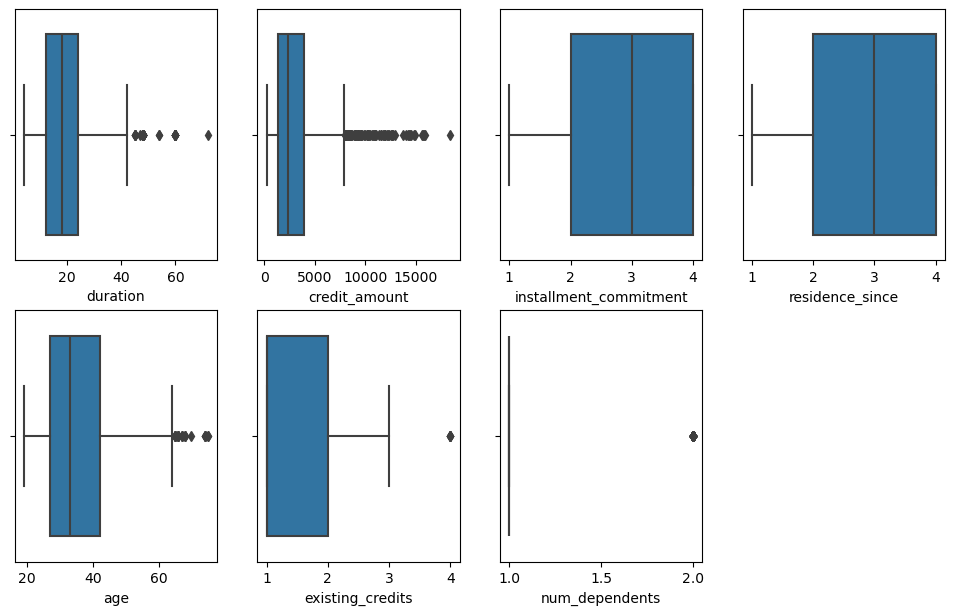

In [8]:
print('------------------Outliers Check-----------------')

num_cols = data._get_numeric_data().columns
plt.figure(figsize=(12,15))
for i, j in enumerate(num_cols):
  plt.subplot(4, 4, i+1)
  sns.boxplot(x=data[j])

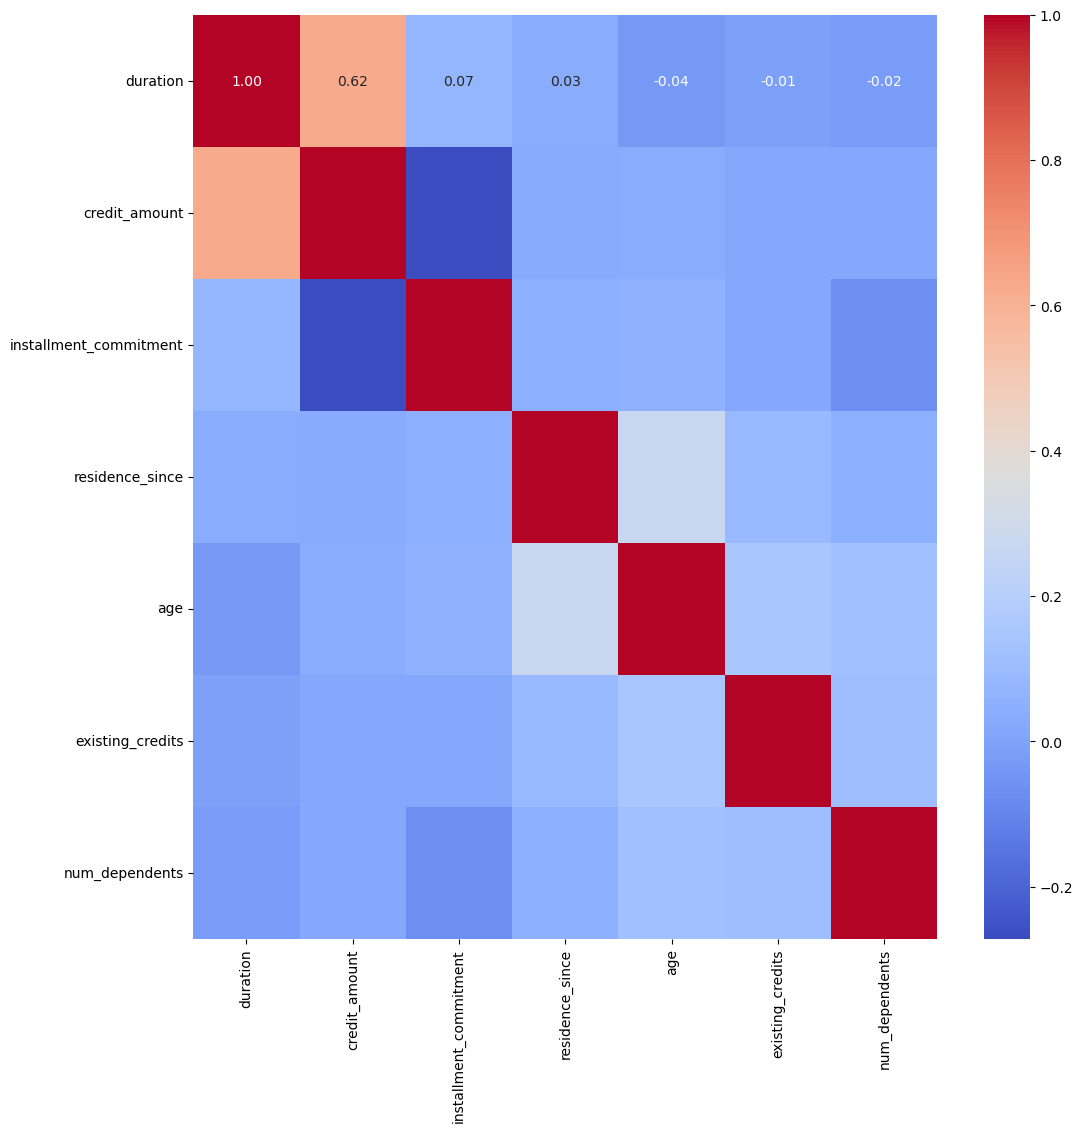

In [9]:
corr = data._get_numeric_data().corr()
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

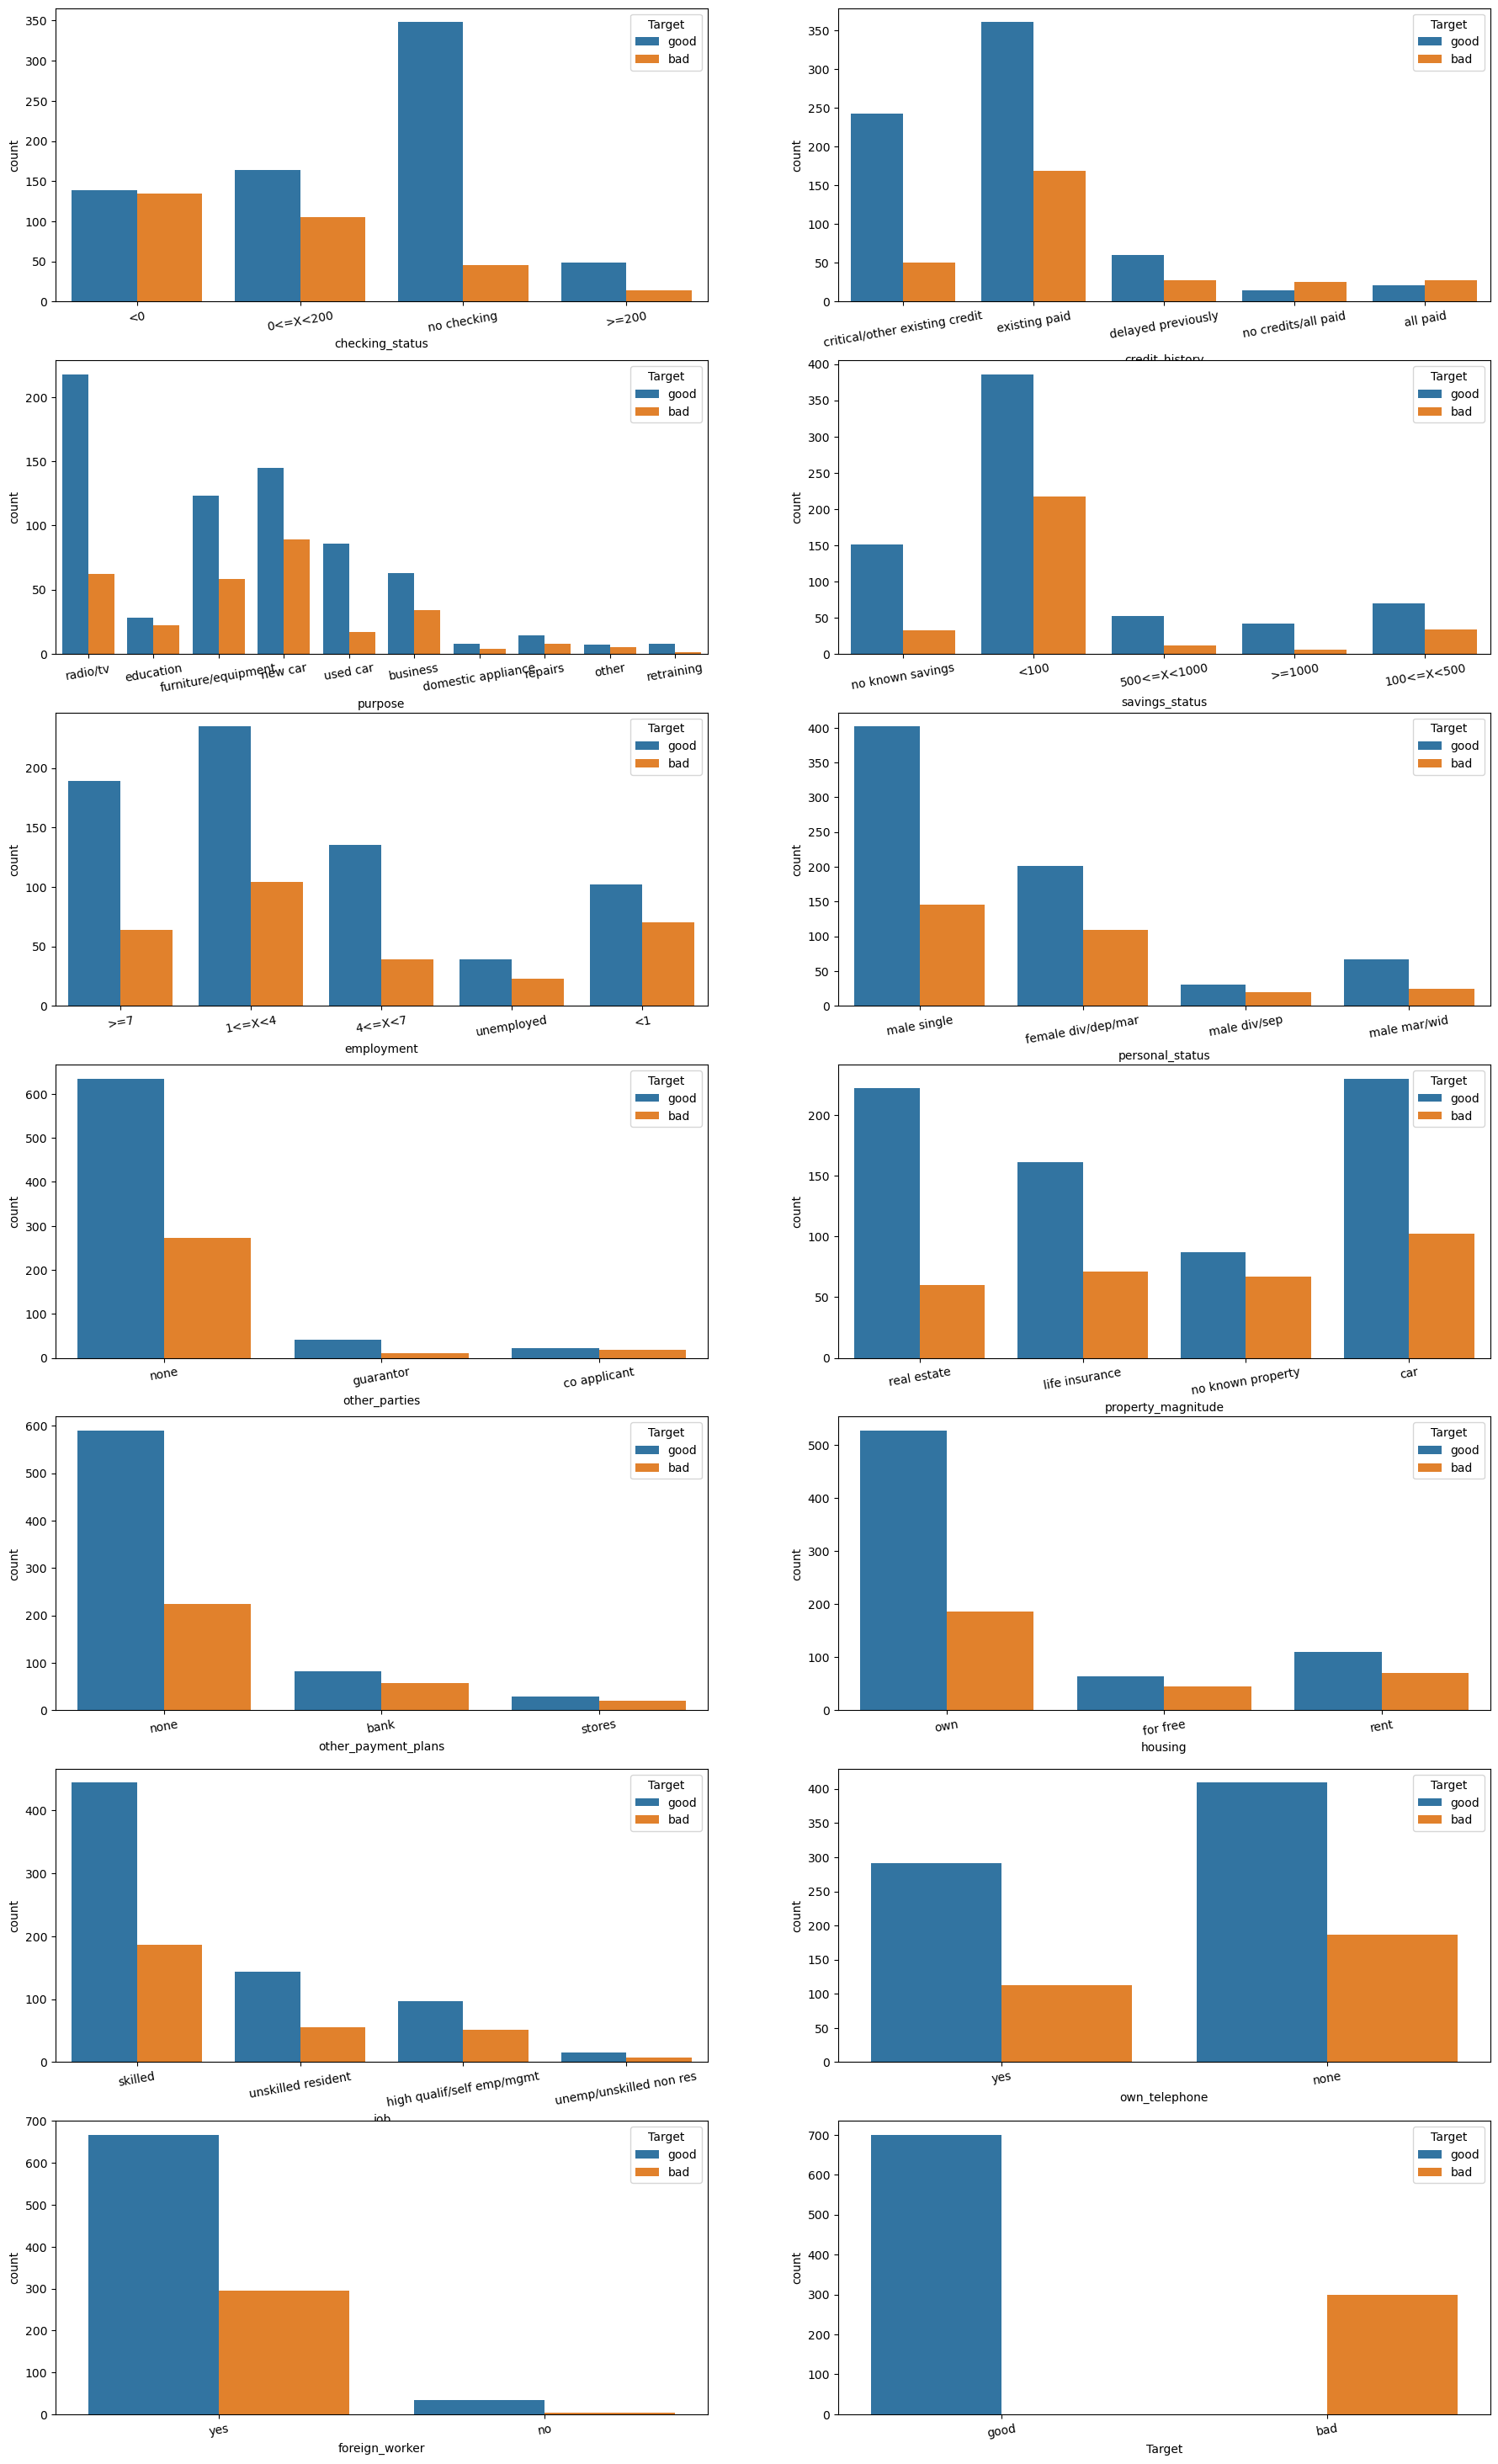

In [10]:
plt.figure(figsize=(22,48))


for i, j in enumerate(cat_data.columns):
  plt.subplot(9, 2, i+1)
  s = sns.countplot(x = j, data = data, hue="Target")
  plt.xticks(rotation=10)


2. Column that is interesting to see is the `porpose`. There a high varaition of the type, so, maybe this column could tell us something.
3. Looking at `credit_history` col, we can see that, when is `all paid` or `no credits`, the credit has a tendence to be denied (given the class balancing proportions). So, we can wonder is because of interest rate (the more the customer pays well, more the bank will not earn over interest rate). However, we can think about the population inside the group of all paid. What if those people belong to the customers that claims for high amount of credit (another reason for the bank denied the credit)?
4. About the need of foreign workers, we can wonder, due to the economic German situation in the 90's, that there's not enough employees (skilled and unskilled) in the country. However, lets data talk about it...   

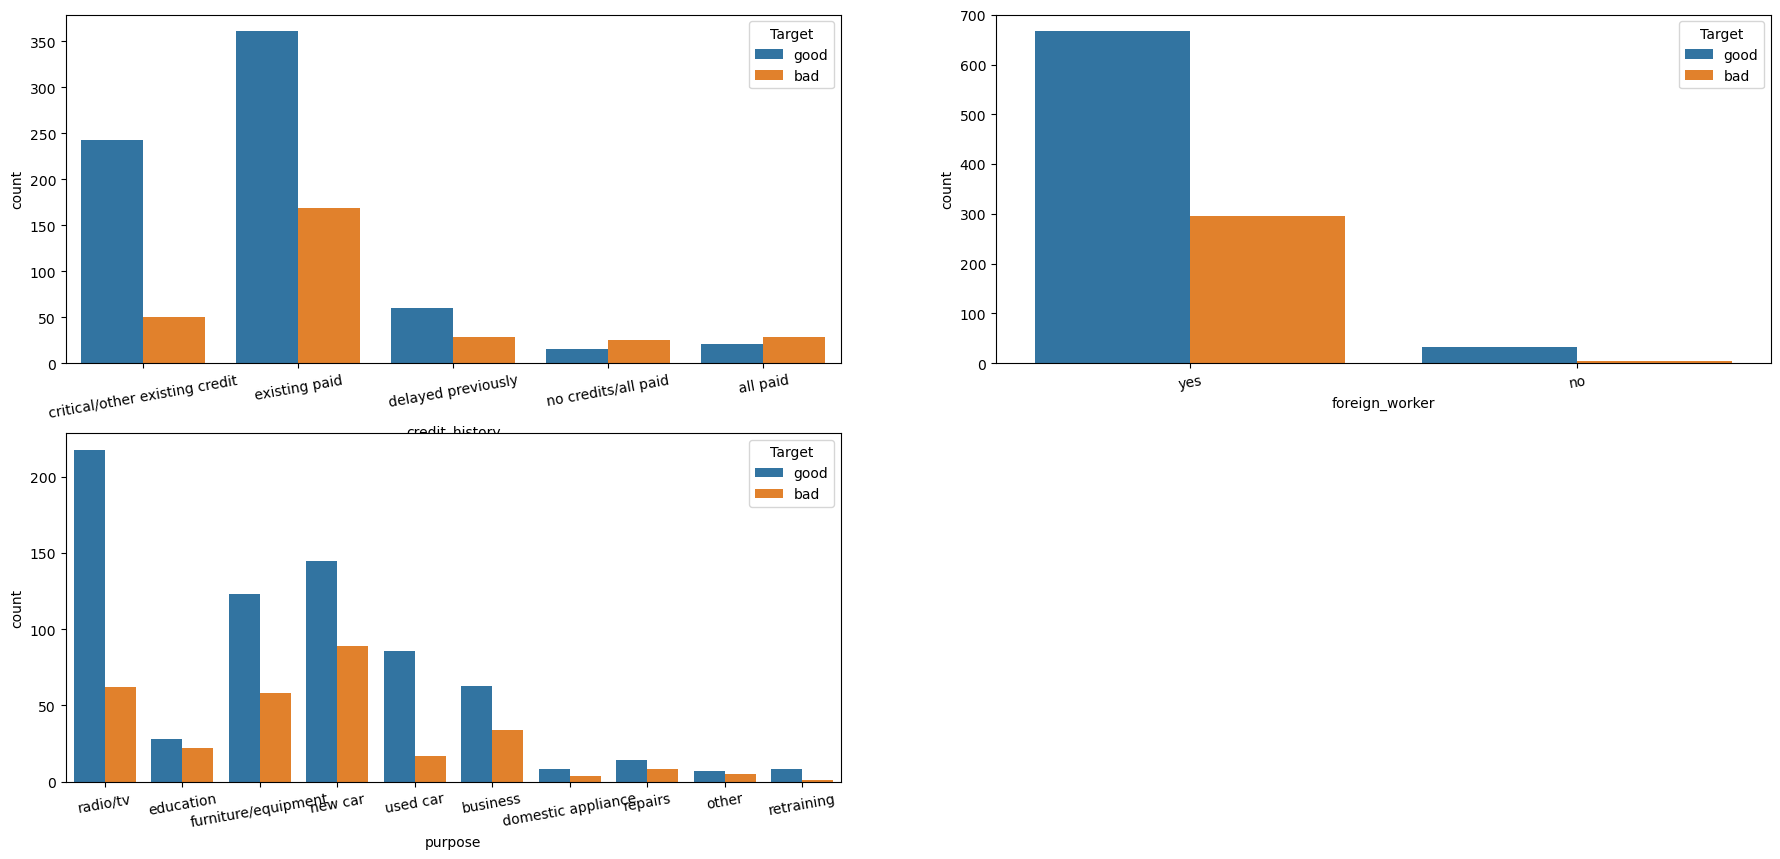

In [11]:
plt.figure(figsize=(22,48))

cols = ['credit_history', 'foreign_worker','purpose']
for i, j in enumerate(cols):
  plt.subplot(9, 2, i+1)
  s = sns.countplot(x = j, data = data, hue="Target")
  plt.xticks(rotation=10)